In [1]:
#
# Create a classifier for digits '1' and '0'
# Train with CNN
# ADD DATA AUGMENTATION
# Shift the digit '1' to the left and to the right 
# Evaluate the model with shifted images
# Conclusion
# Author: Luis A. Mateos

# pip install tensorflow-datasets
# pip install tensorflow --upgrade
# pip install scipy

import os
path_base = os.getcwd()
#'\home\\github\ml-classifier-no-common-sense\\'
path_dir = os.path.join(path_base+'/ml101/')
train_zero_dir = os.path.join(path_base+'/ml101/0/')
train_one_dir = os.path.join(path_base+'/ml101/1/')

# print directories with training images
print(train_zero_dir)
print(train_one_dir)

# print filename from each directory
train_zero_names = os.listdir(train_zero_dir)
print(train_zero_names[0])
train_one_names = os.listdir(train_one_dir)
print(train_one_names[0])

# print total training images
print("Total training zero images= ", len(os.listdir(train_zero_dir)))
print("Total training one images= ", len(os.listdir(train_one_dir)))

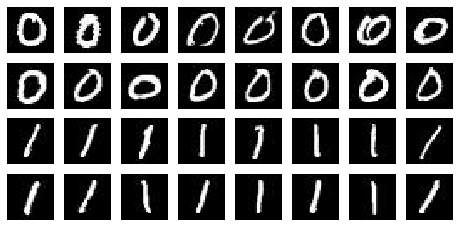

In [2]:
#
# Visualize some of the training images
#
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg   

nrows, ncols = 8,8
pic_index = 0

fig = plt.gcf()
fig.set_size_inches(ncols*1, nrows*1)

pic_index += 16
next_zero_pix = [os.path.join(train_zero_dir, fname)
                for fname in train_zero_names[pic_index-16:pic_index]]
next_one_pix = [os.path.join(train_one_dir, fname)
                for fname in train_one_names[pic_index-16:pic_index]]

for i, img_path in enumerate(next_zero_pix + next_one_pix):
    sp = plt.subplot(nrows, ncols, i+1)
    sp.axis('off')
    
    img = mpimg.imread(img_path)
    #R, G, B = img[:,:,0], img[:,:,1], img[:,:,2]
    #imgGray = 0.2989 * R + 0.5870 * G + 0.1140 * B
    #plt.imshow(imgGray, cmap='gray')
    
    plt.imshow(img, cmap='gray')
    
plt.show()

In [3]:
#
# From basic CNN, if the '1' is shifted to the left or the right
# then the classifier mistakes the one to '0'

#https://github.com/lamateos123/ml-classifier-no-common-sense/blob/main/mnist_1_0_basic.ipynb

In [4]:
#
# CNN
#
import tensorflow as tf
print(tf.__version__)

model = tf.keras.models.Sequential([tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
                                   tf.keras.layers.MaxPool2D(2,2),
                                   tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
                                   tf.keras.layers.MaxPool2D(2,2),
                                   tf.keras.layers.Flatten(),
                                   tf.keras.layers.Dense(128, activation='relu'),
                                   tf.keras.layers.Dense(1, activation='sigmoid')
                                   ])

model.compile(optimizer='adam',
             loss='binary_crossentropy',
             metrics=['accuracy']
             )

2.9.1


In [21]:
#
# DATA AUGMENTATION
#
# let's do it only in the ones
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_generator_visualizer = ImageDataGenerator(
      #rescale=1./255,
      rotation_range=33,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest')

# Flow training images in batches of 128 using train_datagen generator
train_generator_visualizer = train_generator_visualizer.flow_from_directory(
        path_dir,  # This is the source directory for training images
        target_size=(28, 28),  # All images will be resized to 28x28
        batch_size=128,
        # Since we use binary_crossentropy loss, we need binary labels
        class_mode='binary')

Found 8816 images belonging to 2 classes.


<class 'tuple'>
<class 'numpy.ndarray'>
(128, 28, 28, 3)


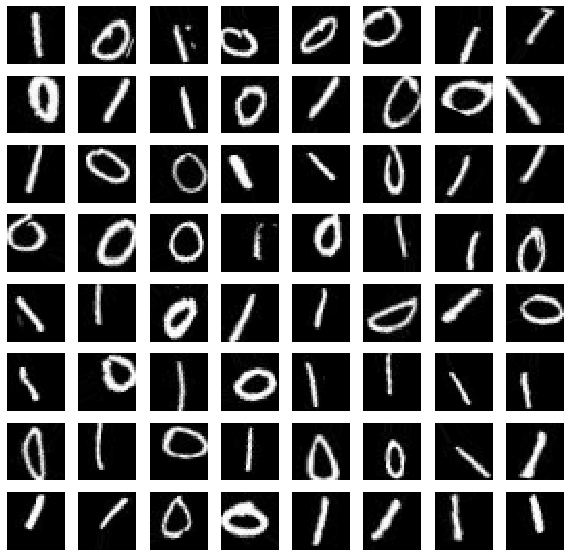

In [22]:
import matplotlib.pyplot as plt
import numpy as np

#plt.figure(figsize=(10, 10))
for image in train_generator_visualizer:
    print(type(image))
    print(type(image[0]))
    print(image[0].shape)
#    plt.imshow(image[0].astype("uint8"))
    break
    
plt.figure(figsize=(10, 10))
for images, labels in train_generator_visualizer:#.take(1):
    for i in range(64):
        ax = plt.subplot(8, 8, i + 1)
        plt.imshow(images[i].astype("uint8"))
        plt.axis("off")
    break

In [5]:
#
# DATA AUGMENTATION
#
# let's do it only in the ones
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(
      rescale=1./255,
      rotation_range=33,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest')

# Flow training images in batches of 128 using train_datagen generator
train_generator = train_datagen.flow_from_directory(
        path_dir,  # This is the source directory for training images
        target_size=(28, 28),  # All images will be resized to 28x28
        batch_size=128,
        # Since we use binary_crossentropy loss, we need binary labels
        class_mode='binary')

Found 8816 images belonging to 2 classes.


In [6]:
history = model.fit(train_generator,
                   steps_per_epoch=8,
                   epochs=5,
                   verbose=2)

Epoch 1/5
8/8 - 1s - loss: 0.5471 - accuracy: 0.6816 - 1s/epoch - 155ms/step
Epoch 2/5
8/8 - 1s - loss: 0.2885 - accuracy: 0.8672 - 873ms/epoch - 109ms/step
Epoch 3/5
8/8 - 1s - loss: 0.1970 - accuracy: 0.9111 - 858ms/epoch - 107ms/step
Epoch 4/5
8/8 - 1s - loss: 0.1209 - accuracy: 0.9570 - 859ms/epoch - 107ms/step
Epoch 5/5
8/8 - 1s - loss: 0.0728 - accuracy: 0.9746 - 867ms/epoch - 108ms/step


In [7]:
#
# Helper functions for plotting
#
import numpy as np
import os
import matplotlib.image as mpimg

from tensorflow.keras.preprocessing import image

x_images=[]

def common(path_directory,path_split,expected=1):
    paths = []
    path = path_directory#train_one_dir#path_base+'imnist/1/'

    # setting the pahts to look for the images
    one_names = os.listdir(path)

    # show some images from '0'
    nrows, ncols = 8,8
    pic_index = 0

    fig = plt.gcf()
    fig.set_size_inches(ncols*1, nrows*1)

    pic_index += 16
    next_one__pix = [os.path.join(path, fname)
                    for fname in one_names[pic_index-16:pic_index]]

    for i, img_path in enumerate(next_one__pix):
        sp = plt.subplot(nrows, ncols, i+1)
        sp.axis('off')

        img = mpimg.imread(img_path)
        plt.imshow(img, cmap='gray')

    plt.show()


    for f in os.listdir(path):
        paths.append(os.path.join(path,f))

    #from skimage import io

    i=0
    c_zero=0
    c_one=0
    for path in paths:
        img = image.load_img(path, target_size=(28,28))

        x = image.img_to_array(img)
        #normalize
        x = x/255.0
        #print(np.amin(x),np.amax(x))
        x = np.expand_dims(x, axis=0)

        images = np.vstack([x])
        classes = model.predict(images, batch_size=10)
        path_dir = path.split(path_split)#"ml101/")
        if classes[0]>=0.5:
            print("=[1]   ",end="")
        else:
            print("=[0]   ",end="")
        if expected==1 and classes[0]<0.5:
            c_zero+=1
            x_images.append(path_dir)
            print("xxx = ",str(c_zero)," from ",str(i))
        
        if expected==0 and classes[0]>0.5:
            c_one+=1
            print("xxx = ",str(c_one)," from ",str(i))
            
        print(classes[0], path_dir[1])
        i+=1
        if i>=16:
            break

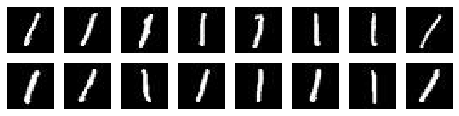

1/1 [==============================] - 0s 66ms/step
=[1]   [0.9929895] 1/img_36495.jpg
1/1 [==============================] - 0s 16ms/step
=[1]   [0.9941559] 1/img_23229.jpg
1/1 [==============================] - 0s 17ms/step
=[1]   [0.9932505] 1/img_31935.jpg
1/1 [==============================] - 0s 15ms/step
=[1]   [0.9877026] 1/img_2549.jpg
1/1 [==============================] - 0s 16ms/step
=[1]   [0.9823247] 1/img_7556.jpg
1/1 [==============================] - 0s 17ms/step
=[1]   [0.9853808] 1/img_23019.jpg
1/1 [==============================] - 0s 19ms/step
=[1]   [0.9890965] 1/img_28693.jpg
1/1 [==============================] - 0s 18ms/step
=[1]   [0.9911209] 1/img_342.jpg
1/1 [==============================] - 0s 17ms/step
=[1]   [0.9918914] 1/img_35081.jpg
1/1 [==============================] - 0s 14ms/step
=[1]   [0.99421656] 1/img_1570.jpg
1/1 [==============================] - 0s 16ms/step
=[1]   [0.9901197] 1/img_23463.jpg
1/1 [==============================] - 0s 15ms/

In [8]:
#
# Evaluate test images with ONEs
#
common(train_one_dir,"ml101/")

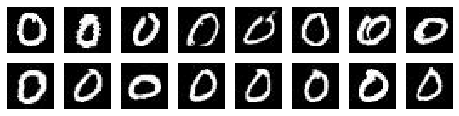

1/1 [==============================] - 0s 15ms/step
=[0]   [2.7142434e-07] 0/img_28894.jpg
1/1 [==============================] - 0s 17ms/step
=[0]   [0.00010741] 0/img_18260.jpg
1/1 [==============================] - 0s 16ms/step
=[0]   [8.7803484e-05] 0/img_14179.jpg
1/1 [==============================] - 0s 14ms/step
=[0]   [3.9668954e-05] 0/img_129.jpg
1/1 [==============================] - 0s 16ms/step
=[0]   [9.909205e-05] 0/img_1729.jpg
1/1 [==============================] - 0s 18ms/step
=[0]   [4.6408645e-06] 0/img_38201.jpg
1/1 [==============================] - 0s 16ms/step
=[0]   [3.364084e-07] 0/img_403.jpg
1/1 [==============================] - 0s 18ms/step
=[0]   [5.435768e-06] 0/img_1544.jpg
1/1 [==============================] - 0s 21ms/step
=[0]   [6.20575e-07] 0/img_35946.jpg
1/1 [==============================] - 0s 18ms/step
=[0]   [5.9245707e-05] 0/img_18729.jpg
1/1 [==============================] - 0s 18ms/step
=[0]   [2.758459e-06] 0/img_38113.jpg
1/1 [=========

In [9]:
#
# Evaluate test images with ZEROs
#
common(train_zero_dir,"ml101/",0)

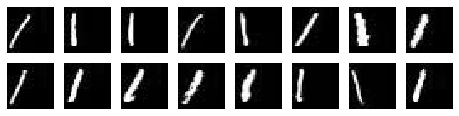

1/1 [==============================] - 0s 15ms/step
=[1]   [0.9289256] img_342.jpg
1/1 [==============================] - 0s 18ms/step
=[0]   xxx =  1  from  1
[0.28498086] img_2.jpg
1/1 [==============================] - 0s 15ms/step
=[0]   xxx =  2  from  2
[0.46889108] img_527.jpg
1/1 [==============================] - 0s 16ms/step
=[1]   [0.8440576] img_255.jpg
1/1 [==============================] - 0s 14ms/step
=[0]   xxx =  3  from  4
[0.2535177] img_295.jpg
1/1 [==============================] - 0s 19ms/step
=[1]   [0.9869188] img_249.jpg
1/1 [==============================] - 0s 20ms/step
=[1]   [0.91699654] img_549.jpg
1/1 [==============================] - 0s 19ms/step
=[1]   [0.98708606] img_152.jpg
1/1 [==============================] - 0s 20ms/step
=[1]   [0.94511884] img_468.jpg
1/1 [==============================] - 0s 16ms/step
=[1]   [0.8683692] img_68.jpg
1/1 [==============================] - 0s 16ms/step
=[1]   [0.8998274] img_185.jpg
1/1 [==========================

In [10]:
#
# ONEs shifted to the left
#
common(path_base+'/sl1/',"sl1/")

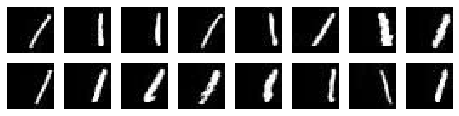

1/1 [==============================] - 0s 13ms/step
=[1]   [0.9967236] img_342.jpg
1/1 [==============================] - 0s 16ms/step
=[0]   xxx =  1  from  1
[0.41147146] img_2.jpg
1/1 [==============================] - 0s 16ms/step
=[1]   [0.50886977] img_527.jpg
1/1 [==============================] - 0s 16ms/step
=[1]   [0.9985437] img_255.jpg
1/1 [==============================] - 0s 14ms/step
=[0]   xxx =  2  from  4
[0.22343324] img_295.jpg
1/1 [==============================] - 0s 19ms/step
=[1]   [0.9980396] img_249.jpg
1/1 [==============================] - 0s 16ms/step
=[1]   [0.8095873] img_549.jpg
1/1 [==============================] - 0s 19ms/step
=[1]   [0.98877025] img_152.jpg
1/1 [==============================] - 0s 18ms/step
=[1]   [0.9048399] img_468.jpg
1/1 [==============================] - 0s 17ms/step
=[1]   [0.9900578] img_68.jpg
1/1 [==============================] - 0s 17ms/step
=[1]   [0.99793583] img_185.jpg
1/1 [==============================] - 0s 17ms/st

In [11]:
#
# ONEs shifted to the right
#
common(path_base+'/sr1/',"sr1/")

1/1 [==============================] - 0s 14ms/step
[0.]


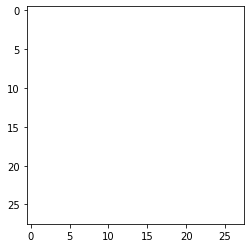

In [12]:
#
# A white image is 100% sure that is a ZERO
#
path = path_base+'/x/img_white.jpg'

img = mpimg.imread(path)
plt.imshow(img)

img = image.load_img(path, target_size=(28,28))
x = image.img_to_array(img)
x = x/255.0
x = np.expand_dims(x, axis=0)

images = np.vstack([x])
classes = model.predict(images, batch_size=10)

print(classes[0])

1/1 [==============================] - 0s 17ms/step
[0.8453536]


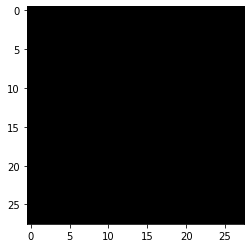

In [13]:
#
# A black image is a ONE
#
path = path_base+'/x/img_black.jpg'

img = mpimg.imread(path)
plt.imshow(img)

img = image.load_img(path, target_size=(28,28))
x = image.img_to_array(img)
x = x/255.0
x = np.expand_dims(x, axis=0)

images = np.vstack([x])
classes = model.predict(images, batch_size=10)

print(classes[0])

1/1 [==============================] - 0s 14ms/step
[0.02061282]


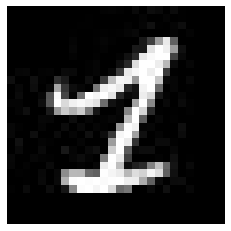

In [14]:
#
# Test with images from the training set
#
path = path_base+'/ml101/1/img_23039.jpg'

img = mpimg.imread(path)
plt.axis('off')
plt.imshow(img, cmap='gray')

img = image.load_img(path, target_size=(28,28))
x = image.img_to_array(img)
x = x/255.0
x = np.expand_dims(x, axis=0)

images = np.vstack([x])
classes = model.predict(images, batch_size=10)

print(classes[0])

1/1 [==============================] - 0s 16ms/step
[0.00695732]


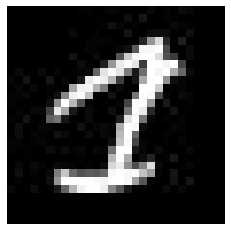

In [15]:
#
# Test with images from the training set
#
path = path_base+'/ml101/1/img_4789.jpg'

img = mpimg.imread(path)
plt.axis('off')
plt.imshow(img, cmap='gray')

img = image.load_img(path, target_size=(28,28))
x = image.img_to_array(img)
x = x/255.0
x = np.expand_dims(x, axis=0)

images = np.vstack([x])
classes = model.predict(images, batch_size=10)

print(classes[0])